# Worksheet 19

Name: Youxuan Ma

UID: U23330522

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.996020587135359
0.9960236048622283
0.9960641820455785
0.9960757088740998
0.9960841674512863
0.9961056920652915
0.9961089187442826
0.9961237304094405
0.9961349517705512
0.996254372204173
0.9963547347037927
0.9964908111354599
0.9964993605196898
0.9963246448294422


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
0.1079568967877087


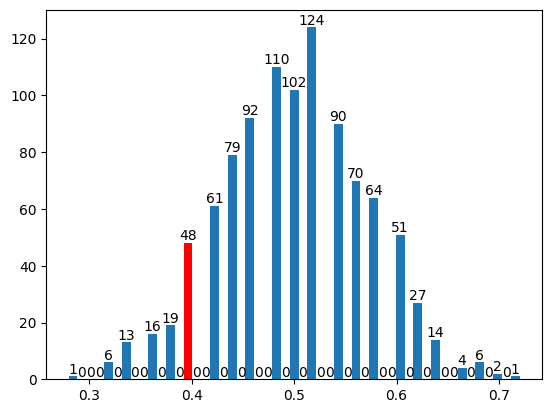

In [20]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 50
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

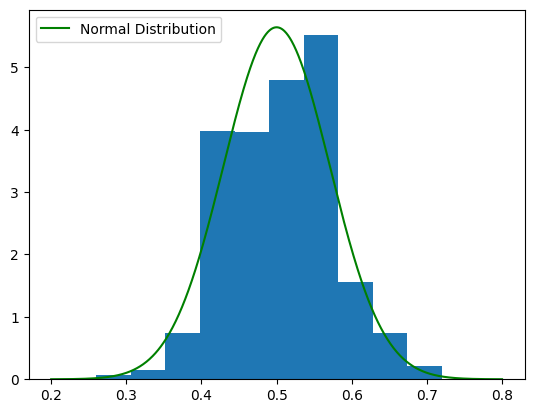

In [21]:
from scipy.stats import norm

SAMPLE_SIZE = 50
p_est = []
p = 1/2
stdev = (p * (1 - p) / SAMPLE_SIZE) ** (1/2)

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_hat = sum(flips) / SAMPLE_SIZE
    p_est.append(p_hat)

xs = np.linspace(.2,.8,1000)
fig, ax = plt.subplots()
ax.hist(p_est, density=True)
ax.plot(xs, norm.pdf(xs, p, stdev), color='green', label='Normal Distribution')
ax.legend()
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

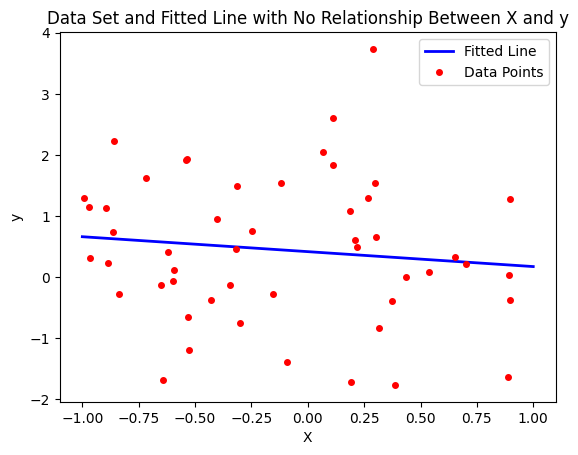

In [22]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 50

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = 0.5 + np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot, 'b-', lw=2, label='Fitted Line')
plt.plot(xlin, y, 'ro', markersize=4, label='Data Points')
plt.title('Data Set and Fitted Line with No Relationship Between X and y')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

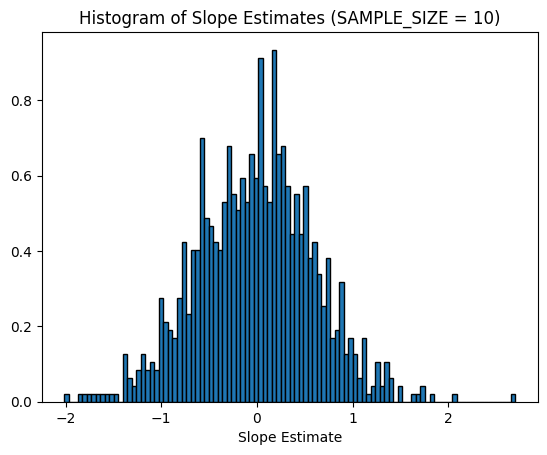

In [23]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10
DATASETS = 1000

slope_estimates = []

for _ in range(DATASETS):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0.5 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    slope_estimates.append(beta[1])

plt.hist(slope_estimates, bins=100, edgecolor='black', density=True)
plt.title('Histogram of Slope Estimates (SAMPLE_SIZE = 10)')
plt.xlabel('Slope Estimate')
plt.show()


The plot visualizes the distribution of slope estimates obtained from fitting a linear model to 1000 independent datasets. 

Since there's no real relationship between X and y (as y is generated from random noise), we expect the true slope to be 0. 

The distribution of slope estimates around 0 reflects the sampling variability: how much the slope estimate would vary if we repeated our study on different samples of the same size drawn from the population. A narrow distribution suggests our estimates are precise, whereas a wide distribution indicates a high degree of variability.

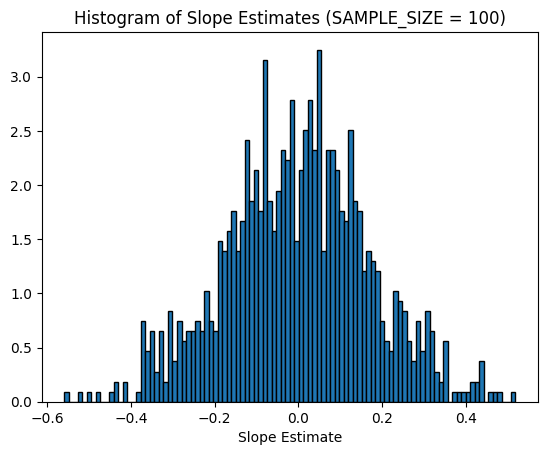

In [24]:
SAMPLE_SIZE = 100  # Increased sample size
DATASETS = 1000
slope_estimates_large_sample = []

for _ in range(DATASETS):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0.5 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    slope_estimates_large_sample.append(beta[1])

plt.hist(slope_estimates_large_sample, bins=100, edgecolor='black', density=True)
plt.title('Histogram of Slope Estimates (SAMPLE_SIZE = 100)')
plt.xlabel('Slope Estimate')
plt.show()


With the increased sample size, the distribution of the slope estimates becomes narrower, indicating a reduction in variability. This effect is due to the law of large numbers, which states that as a sample size grows, its mean will get closer to the average of the whole population. 

In this context, with more data, our estimates of the slope should become more precise (less spread out) and more consistent (closer to the true value, which is 0 in this case). This illustrates the importance of sample size in statistical estimation and inference, where larger samples generally provide more reliable estimates.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

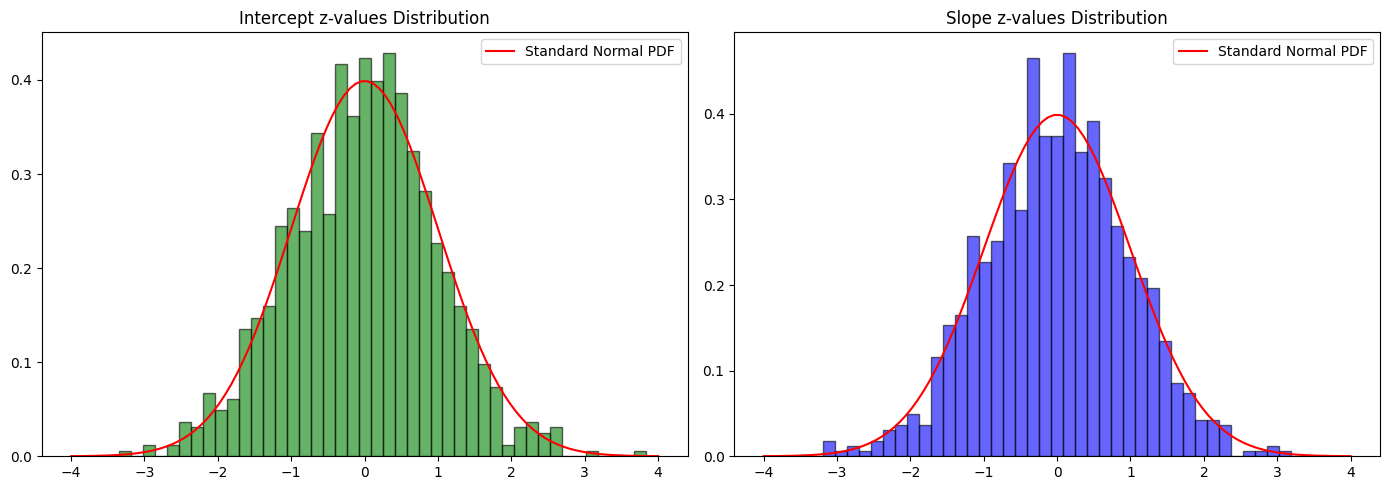

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

SAMPLE_SIZE = 100
DATASETS = 1000
TRUE_BETA = np.array([0.5, 2])

z_values_intercept = []
z_values_slope = []

for _ in range(DATASETS):
    x = np.linspace(-1, 1, SAMPLE_SIZE)
    y = TRUE_BETA[0] + TRUE_BETA[1] * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(SAMPLE_SIZE)
    X = np.vstack([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    S = np.linalg.inv(X.T @ X)

    residuals = y - (X @ beta_hat)
    sigma_squared_estimate = np.sum(residuals**2) / (SAMPLE_SIZE - len(TRUE_BETA))
    
    for k in range(len(TRUE_BETA)):
        S_kk = S[k, k]
        z_k = (beta_hat[k] - TRUE_BETA[k]) / np.sqrt(sigma_squared_estimate * S_kk)
        if k == 0:
            z_values_intercept.append(z_k)
        else:
            z_values_slope.append(z_k)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
bins = np.linspace(-4, 4, 50)

x_pdf = np.linspace(-4, 4, 100)
y_pdf = norm.pdf(x_pdf)

# Intercept
axes[0].hist(z_values_intercept, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')
axes[0].plot(x_pdf, y_pdf, color='red', label='Standard Normal PDF')
axes[0].set_title('Intercept z-values Distribution')
axes[0].legend()

# Slope
axes[1].hist(z_values_slope, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black')
axes[1].plot(x_pdf, y_pdf, color='red', label='Standard Normal PDF')
axes[1].set_title('Slope z-values Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

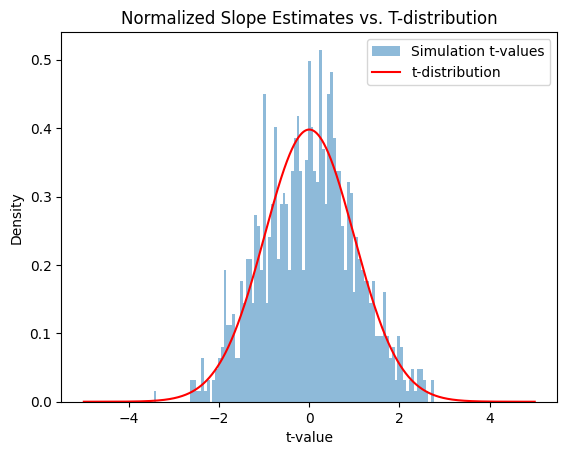

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

SAMPLE_SIZE = 100
DATASETS = 1000
TRUE_BETA = np.array([1, 0])

def standard_error(ytrue, ypred, p):
    rss = np.sum((ytrue - ypred) ** 2)
    n = len(ytrue)
    return np.sqrt(rss / (n - p))

beta_hist = []

for _ in range(1000):
    x = np.linspace(-1, 1, SAMPLE_SIZE)
    y = TRUE_BETA[0] + TRUE_BETA[1] * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(SAMPLE_SIZE)
    X = np.vstack([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ beta_hat

    s = standard_error(y, y_pred, p=2)
    S = np.linalg.inv(X.T @ X)
    se_beta = np.sqrt(S[1, 1] * s ** 2)

    t_value = beta_hat[1] / se_beta
    beta_hist.append(t_value)

xs = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True, alpha=0.5, label='Simulation t-values')
ax.plot(xs, t.pdf(xs, df=SAMPLE_SIZE - 2), color='red', label='t-distribution')
plt.title('Normalized Slope Estimates vs. T-distribution')
ax.set_xlabel('t-value')
ax.set_ylabel('Density')
ax.legend()
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


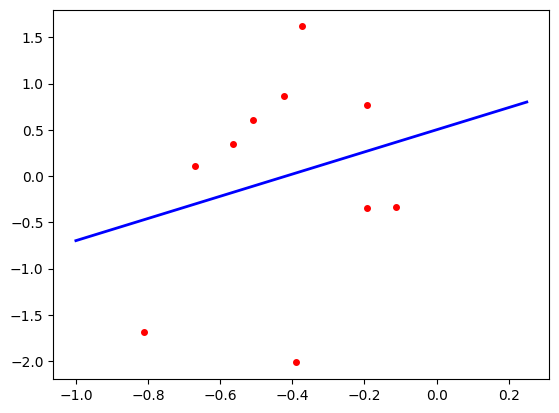

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

y_pred = X @ beta_hat
residuals = y - y_pred
n, p = X.shape
RSS = np.sum(residuals**2)
s_square = RSS / (n - p)

S = np.linalg.inv(X.T @ X)

se_beta1 = np.sqrt(s_square * S[1, 1])
t_stat = beta_hat[1] / se_beta1

# Two-sided p-value for beta_hat[1]
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n-p))

print(f"Estimated coefficients: {beta_hat}")
print(f"p-value for the slope coefficient being zero: {p_value:.4f}")


Estimated coefficients: [0.50155603 1.19902827]
p-value for the slope coefficient being zero: 0.5131


As we get from the result above, the probability of observing a dataset at least as extreme as the above given assuming $\beta = 0$, or the probability of observing a t-statistic as extreme as the one calculated from the given dataset if the null hypothesis were true, is 0.5131.